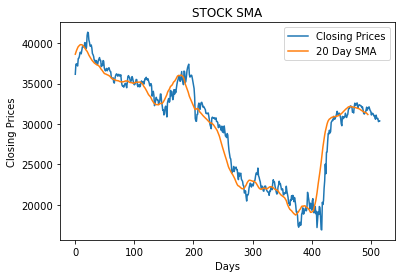

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jan  6 13:51:52 2022

@author: sonis
"""

import pandas as pd
import matplotlib.pyplot as plt

def get_sma(prices, rate):
    return prices.rolling(rate).mean()


excel = r'C:\Users\sonis\data test\data.xlsx'
data = pd.read_excel(excel)
data.head()
#Last 21 days average close price

list_avg_close_price21 = data.loc[0:20, "Close"]
#print(list_avg_close_price21)
avg_close_price21 = sum(data.loc[0:20, "Close"])/21
#print(avg_close_price21)


#Last 50 days average close price

list_avg_close_price50 = data.loc[0:49, "Close"]
#print(list_avg_close_price50)
avg_close_price50 = sum(data.loc[0:49, "Close"])/50
#print(avg_close_price50)

#high == open prices

highopen = data[data["Open"] == data["High"]]
res1 = highopen.iloc[:,[0,1,2,3,4]]
#print(res1)

#low == open prices

lowopen = data[data["Low"] == data["Open"]]
res2 = lowopen.iloc[:,[0,1,2,3,4]]
#print(res2)

#SMA of 20 days 
SMA20 = []
list_avg_close_price21 = data.loc[517:0:-1, "Close"]
length = len(list_avg_close_price21)
k = 20
for i in range(length - 20,0 ,-1):
    avg20 = sum(round((list_avg_close_price21[i:k + i])/20))
    SMA20.append(avg20)
    
#Plot the data
plt.title('STOCK SMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(list_avg_close_price21, label='Closing Prices')
plt.plot(SMA20, label='20 Day SMA')
plt.legend()
plt.savefig(r'C:\Users\sonis\data test\Stock 20 Day SMA.jpg')
plt.show()

#saving data

Avg21 = pd.DataFrame({'Avg 21': [avg_close_price21]})
Avg50 = pd.DataFrame({'Avg 50': [avg_close_price50]})
writer = pd.ExcelWriter(r'C:\Users\sonis\data test\Assignments.xlsx', engine='xlsxwriter')
Avg21.to_excel(writer, sheet_name='Average close price 21 days', index=False)
Avg50.to_excel(writer, sheet_name='Average close price 50 days', index=False)
res1.to_excel(writer, sheet_name='High == Open Prices', index=False)
res2.to_excel(writer, sheet_name='Low == Open Prices', index=False)
writer.save()
